<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

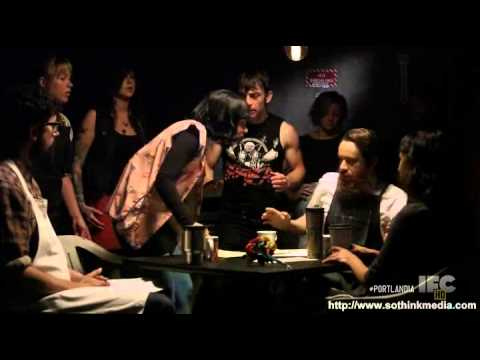

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\sseng\\OneDrive\\Desktop\\Lambda\\projects\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [41]:
import pandas as pd

url = "data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
print(shops.shape)
shops.head()


(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [42]:

shops['full_review_text'] = shops['full_review_text'].str.replace('\d+', '')
shops['star_rating'] = shops.star_rating.str.extract('(\d+)')
shops.head(2)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,// check-in Love love loved the atmosphere! ...,5
1,The Factory - Cafe With a Soul,"// Listed in Date Night: Austin, Ambiance in ...",4


In [28]:
#shops['full_review_text']=shops.full_review_text.str.replace('[^a-zA-Z]', '')
#shops.head(2)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,checkinLovelovelovedtheatmosphereEverycornerof...,5
1,The Factory - Cafe With a Soul,ListedinDateNightAustinAmbianceinAustinBEAUTIF...,4


In [43]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [44]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [45]:
shops['tokens'].head()

0    [checkin, love, love, loved, the, atmosphere, ...
1    [listed, in, date, night, austin, ambiance, in...
2    [checkin, listed, in, brunch, spots, i, loved,...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [checkin, they, are, located, within, the, nor...
Name: tokens, dtype: object

In [46]:
shops[['full_review_text', 'tokens']][:10]

,full_review_text,tokens
0,// check-in Love love loved the atmosphere! ...,"[checkin, love, love, loved, the, atmosphere, ..."
1,"// Listed in Date Night: Austin, Ambiance in ...","[listed, in, date, night, austin, ambiance, in..."
2,// check-in Listed in Brunch Spots I loved t...,"[checkin, listed, in, brunch, spots, i, loved,..."
3,// Very cool decor! Good drinks Nice seating ...,"[very, cool, decor, good, drinks, nice, seatin..."
4,// check-in They are located within the Nort...,"[checkin, they, are, located, within, the, nor..."
5,// check-in Very cute cafe! I think from the...,"[checkin, very, cute, cafe, i, think, from, th..."
6,"// check-ins Listed in ""Nuptial Coffee Bliss...","[checkins, listed, in, nuptial, coffee, bliss,..."
7,// check-ins Love this place! stars for cl...,"[checkins, love, this, place, stars, for, clea..."
8,"// check-in Ok, let's try this approach... ...","[checkin, ok, lets, try, this, approach, pros,..."
9,// check-ins This place has been shown on my...,"[checkins, this, place, has, been, shown, on, ..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

# Analyze Tokens

In [47]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26651),
 ('a', 22756),
 ('i', 20249),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10354),
 ('was', 9707),
 ('in', 9546)]

In [48]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [49]:
# Use the Function
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
37,the,6847,34809,1.0,0.045412,0.045412,0.899028
56,and,6864,26651,2.0,0.034769,0.080180,0.901261
29,a,6246,22756,3.0,0.029687,0.109868,0.820116
53,i,5532,20249,4.0,0.026417,0.136284,0.726366
4,to,5653,17164,5.0,0.022392,0.158676,0.742253


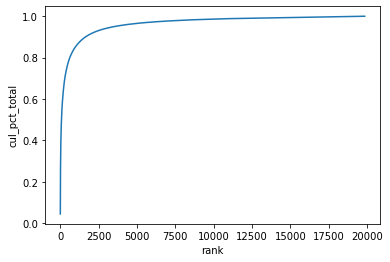

In [50]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [51]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.5426164642156858

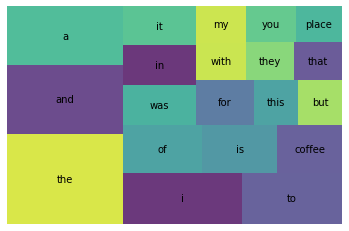

In [52]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# Processing Raw Text with Spacy 

In [54]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [56]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [57]:
wc = count(shops['tokens'])

In [58]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
43,the,6520,27779,1.0,0.034335,0.034335,0.856092
11,,7616,27690,2.0,0.034225,0.068560,1.000000
63,and,6804,25748,3.0,0.031825,0.100385,0.893382
34,a,6181,22085,4.0,0.027297,0.127682,0.811581
54,I,5469,19780,5.0,0.024448,0.152130,0.718093


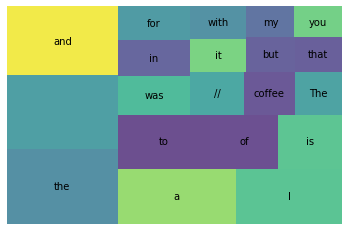

In [59]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
# Spacy's Default Stop Words
nlp.Defaults.stop_words

In [62]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [63]:
shops.tokens.head()

0    [ ,  , check-in, love, love, loved, atmosphere...
1    [ , listed, date, night:, austin,, ambiance, a...
2    [ ,  , check-in, listed, brunch, spots, loved,...
3    [ , cool, decor!, good, drinks, nice, seating,...
4    [ ,  , check-in, located, northcross, mall, sh...
Name: tokens, dtype: object

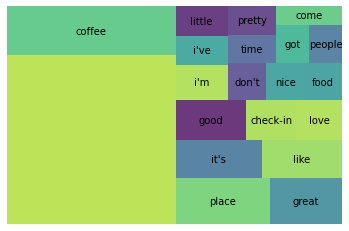

In [64]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# Extending Stop Words

In [65]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [79]:
STOP_WORDS = nlp.Defaults.stop_words.union(['','  ','      ','//','I', "don't", 'i', 'place', 'it', "it's",'this','check-in',"i've","i'm",'little','people'])

In [ ]:
STOP_WORDS

In [76]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [78]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,,7616,27690,1.0,0.069101,0.069101,1.000000
27,coffee,4210,8058,2.0,0.020109,0.089210,0.552784
84,great,2438,3250,3.0,0.008110,0.097321,0.320116
176,like,2034,2902,4.0,0.007242,0.104563,0.267069
182,good,2084,2779,5.0,0.006935,0.111498,0.273634


In [74]:
wc['word']

4                     
27              coffee
84               great
176               like
182               good
             ...      
37806       actuality.
37804           crass.
37807    restrictions.
37809       specially,
37810       digestion,
Name: word, Length: 37811, dtype: object

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

